# Домашнее задание 3 - Шмаков Владимир, Б04-105

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import scipy.stats as sts
from scipy.linalg import svd

### Задача 1 - квартет Энскомба

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии x и y координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод load_dataset('anscombe') .

In [113]:
data = sns.load_dataset('anscombe')
data.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

In [114]:
print(pd.unique(data.dataset))

['I' 'II' 'III' 'IV']


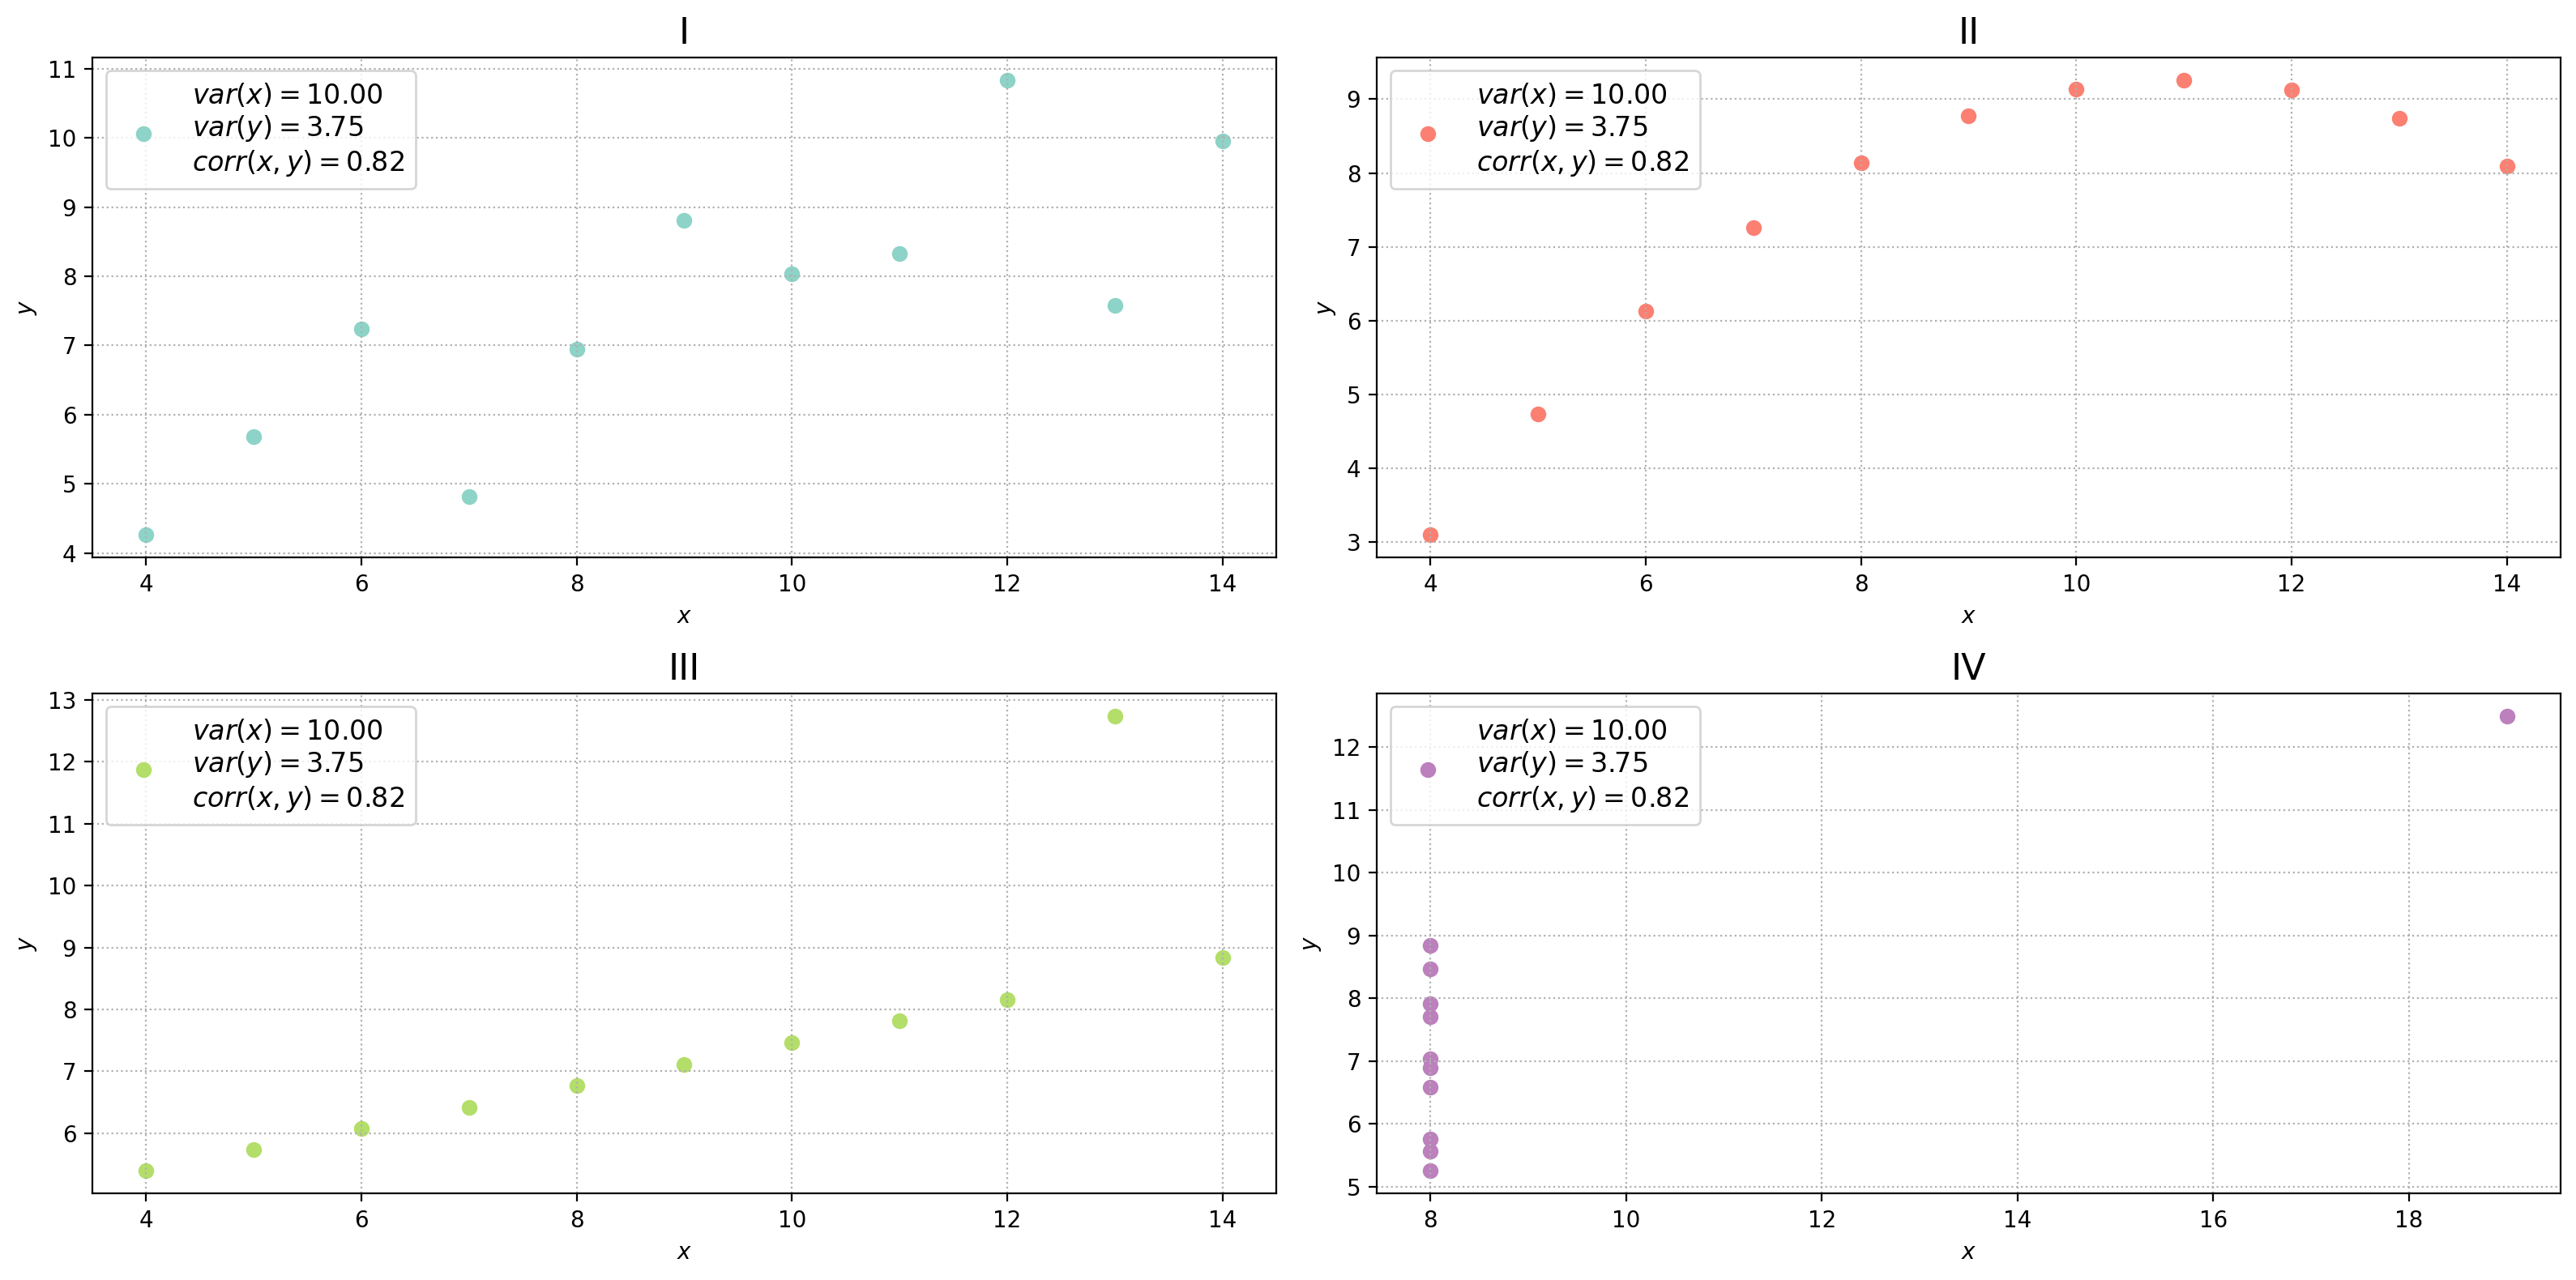

In [115]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8), dpi = 200)

for ind, dataset_name in enumerate(pd.unique(data['dataset'])):
    plotable = ax[ind // 2][ind % 2]
    plotable.grid(ls = ':')
    plotable.set_title(dataset_name, fontsize = 16)
    plotable.set_xlabel("$x$", fontsize = 10)
    plotable.set_ylabel("$y$", fontsize = 10)
    x, y = data[data['dataset'] == dataset_name]['x'].to_numpy(), data[data['dataset'] == dataset_name]['y'].to_numpy()
    x_var, y_var = np.var(x), np.var(y)
    cov = np.mean(x * y) - np.mean(x) * np.mean(y)
    corr = cov / np.sqrt(x_var * y_var)
    plotable.scatter(x, 
                     y, 
                     color = cm.Set3(ind / 4),
                     label = f'$var(x) = {x_var:.2f}$\n$var(y) = {y_var:.2f}$\n$corr(x,y)={corr:.2f}$')
    plotable.legend(fontsize = 12)
    
fig.tight_layout()

### Задача 2 - Централизация признаков и МНК

Покажите, что следующие две процедуры приводят к одинаковому результату:

    В матрице объект-признак X из каждого столбца вычитается среднее по столбцу (централизация признаков). После этого вычисляется (XTX)−1.
    К матрице X дописывается в конец столбец, состоящий из одних единиц. Вычисляется (XTX)−1 и в получившейся матрице вычеркивается последний столбец и последняя строка.


In [116]:
distributions = [sts.uniform, sts.norm, sts.expon, sts.cauchy]
distributions_names = ['U', 'N', 'Г', 'Коши']
experiments_num = 100
for distribution, name in zip(distributions, distributions_names):
    number_of_equalityes = 0
    for _ in range(experiments_num):
        l, n = np.random.randint(10, 1000), np.random.randint(2, 10)
        X = distribution.rvs(size = (l, n))
        X_m1 = X - np.mean(X, axis = 0)
        res1 = np.linalg.inv(X_m1.T @ X_m1)
        X_m2 = np.hstack([X, np.ones(l)[:, np.newaxis]])
        res2 = np.linalg.inv(X_m2.T @ X_m2)
        res2 = res2[:-1, :-1]
        number_of_equalityes += np.allclose(res1, res2)
    print(f"Процедуры экивалентны для распределения {name}: {number_of_equalityes == experiments_num}")

Процедуры экивалентны для распределения U: True
Процедуры экивалентны для распределения N: True
Процедуры экивалентны для распределения Г: True
Процедуры экивалентны для распределения Коши: True


### Задача 4 - Матрица объект - признак

In [117]:
np.random.seed(81)

In [118]:
N = int(1e4)
X = [0, 0, 0]
variance = np.random.random(3)
X[0] = sts.norm(loc = 0, scale = variance[0]).rvs(size = N)
X[1] = sts.norm(loc = 0, scale = variance[1]).rvs(size = N)
X[2] = sts.norm(loc = 0, scale = variance[2]).rvs(size = N)
# X[2] = X[0] * 5
X = np.array(X).T
print("Ковариационная матрица")
print(np.cov(X.T) * 1e2)
U, sigma, VT = np.linalg.svd(X, full_matrices = False)

Ковариационная матрица
[[ 1.27309038e+01  8.37079020e-02 -2.39031065e-01]
 [ 8.37079020e-02  1.17302436e+01 -3.44089014e-02]
 [-2.39031065e-01 -3.44089014e-02  8.84748224e+01]]


Text(0.5, 0, 'i')

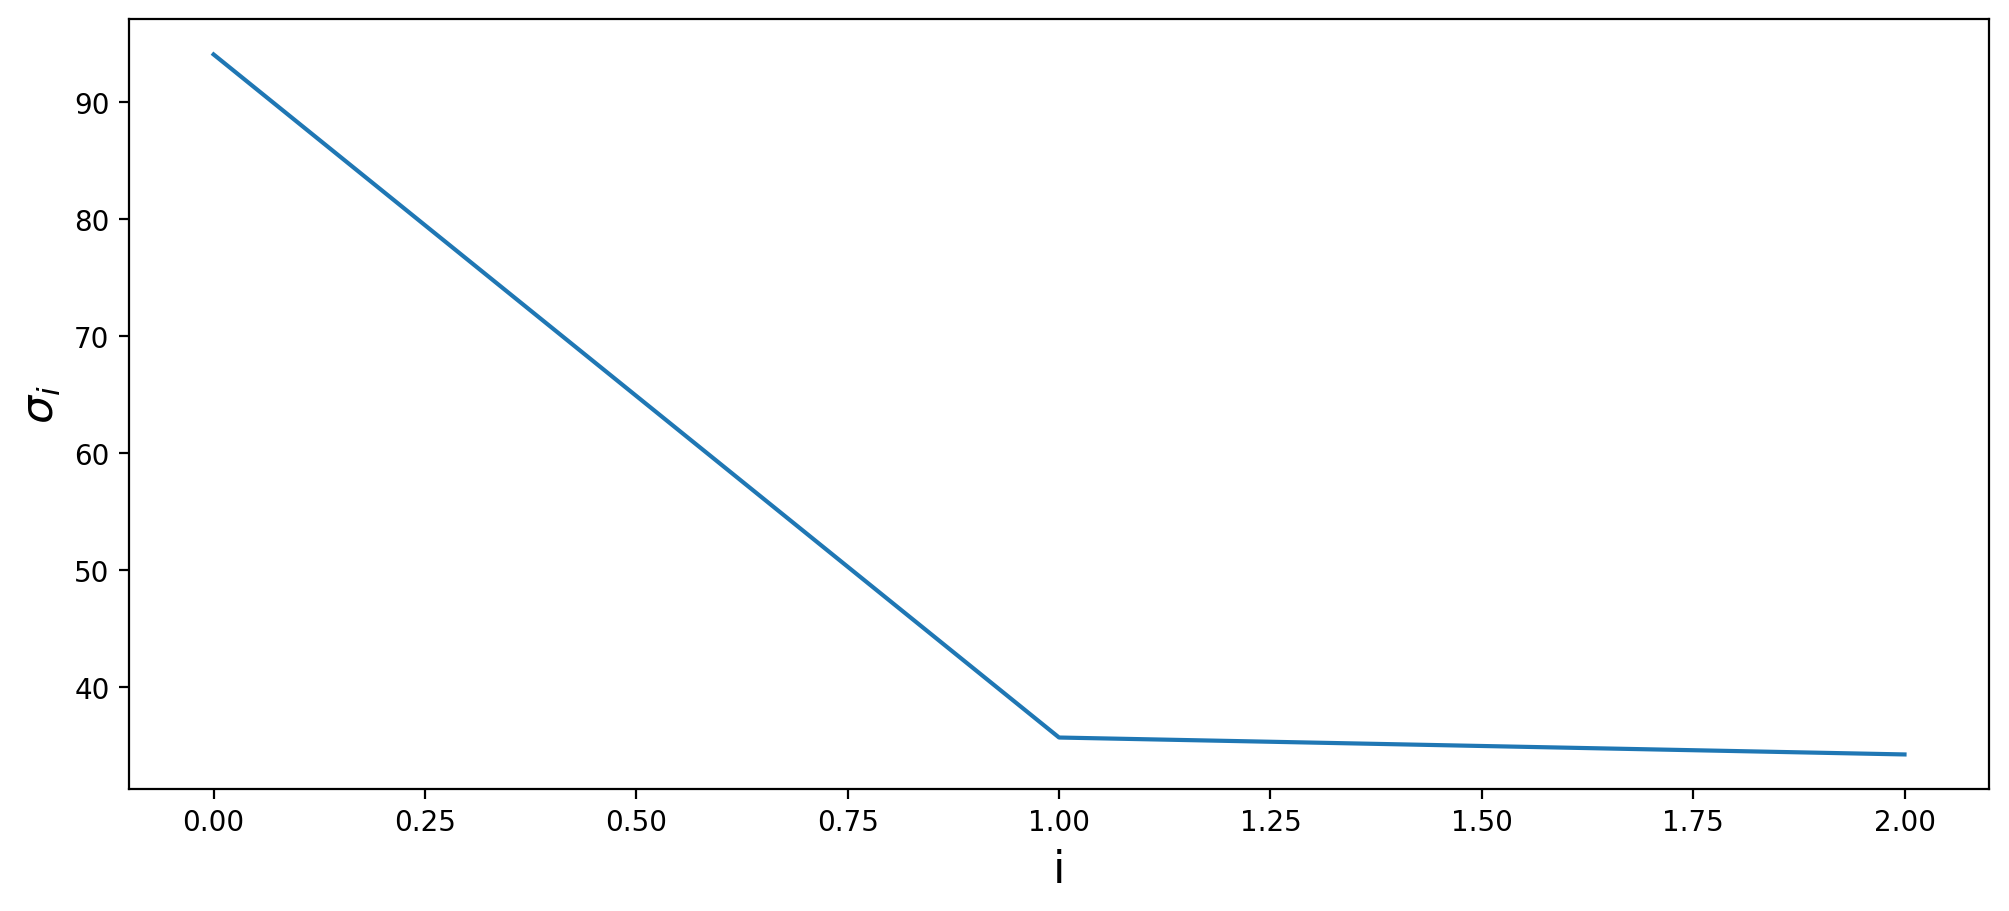

In [119]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(sigma)
plt.ylabel("$\sigma_{i}$", fontsize = 16)
plt.xlabel("i", fontsize = 16)

In [120]:
sigma_wave = np.copy(sigma)
sigma_wave[-1] = 0
X_wave =  np.dot(U, np.dot(np.diag(sigma_wave), VT))

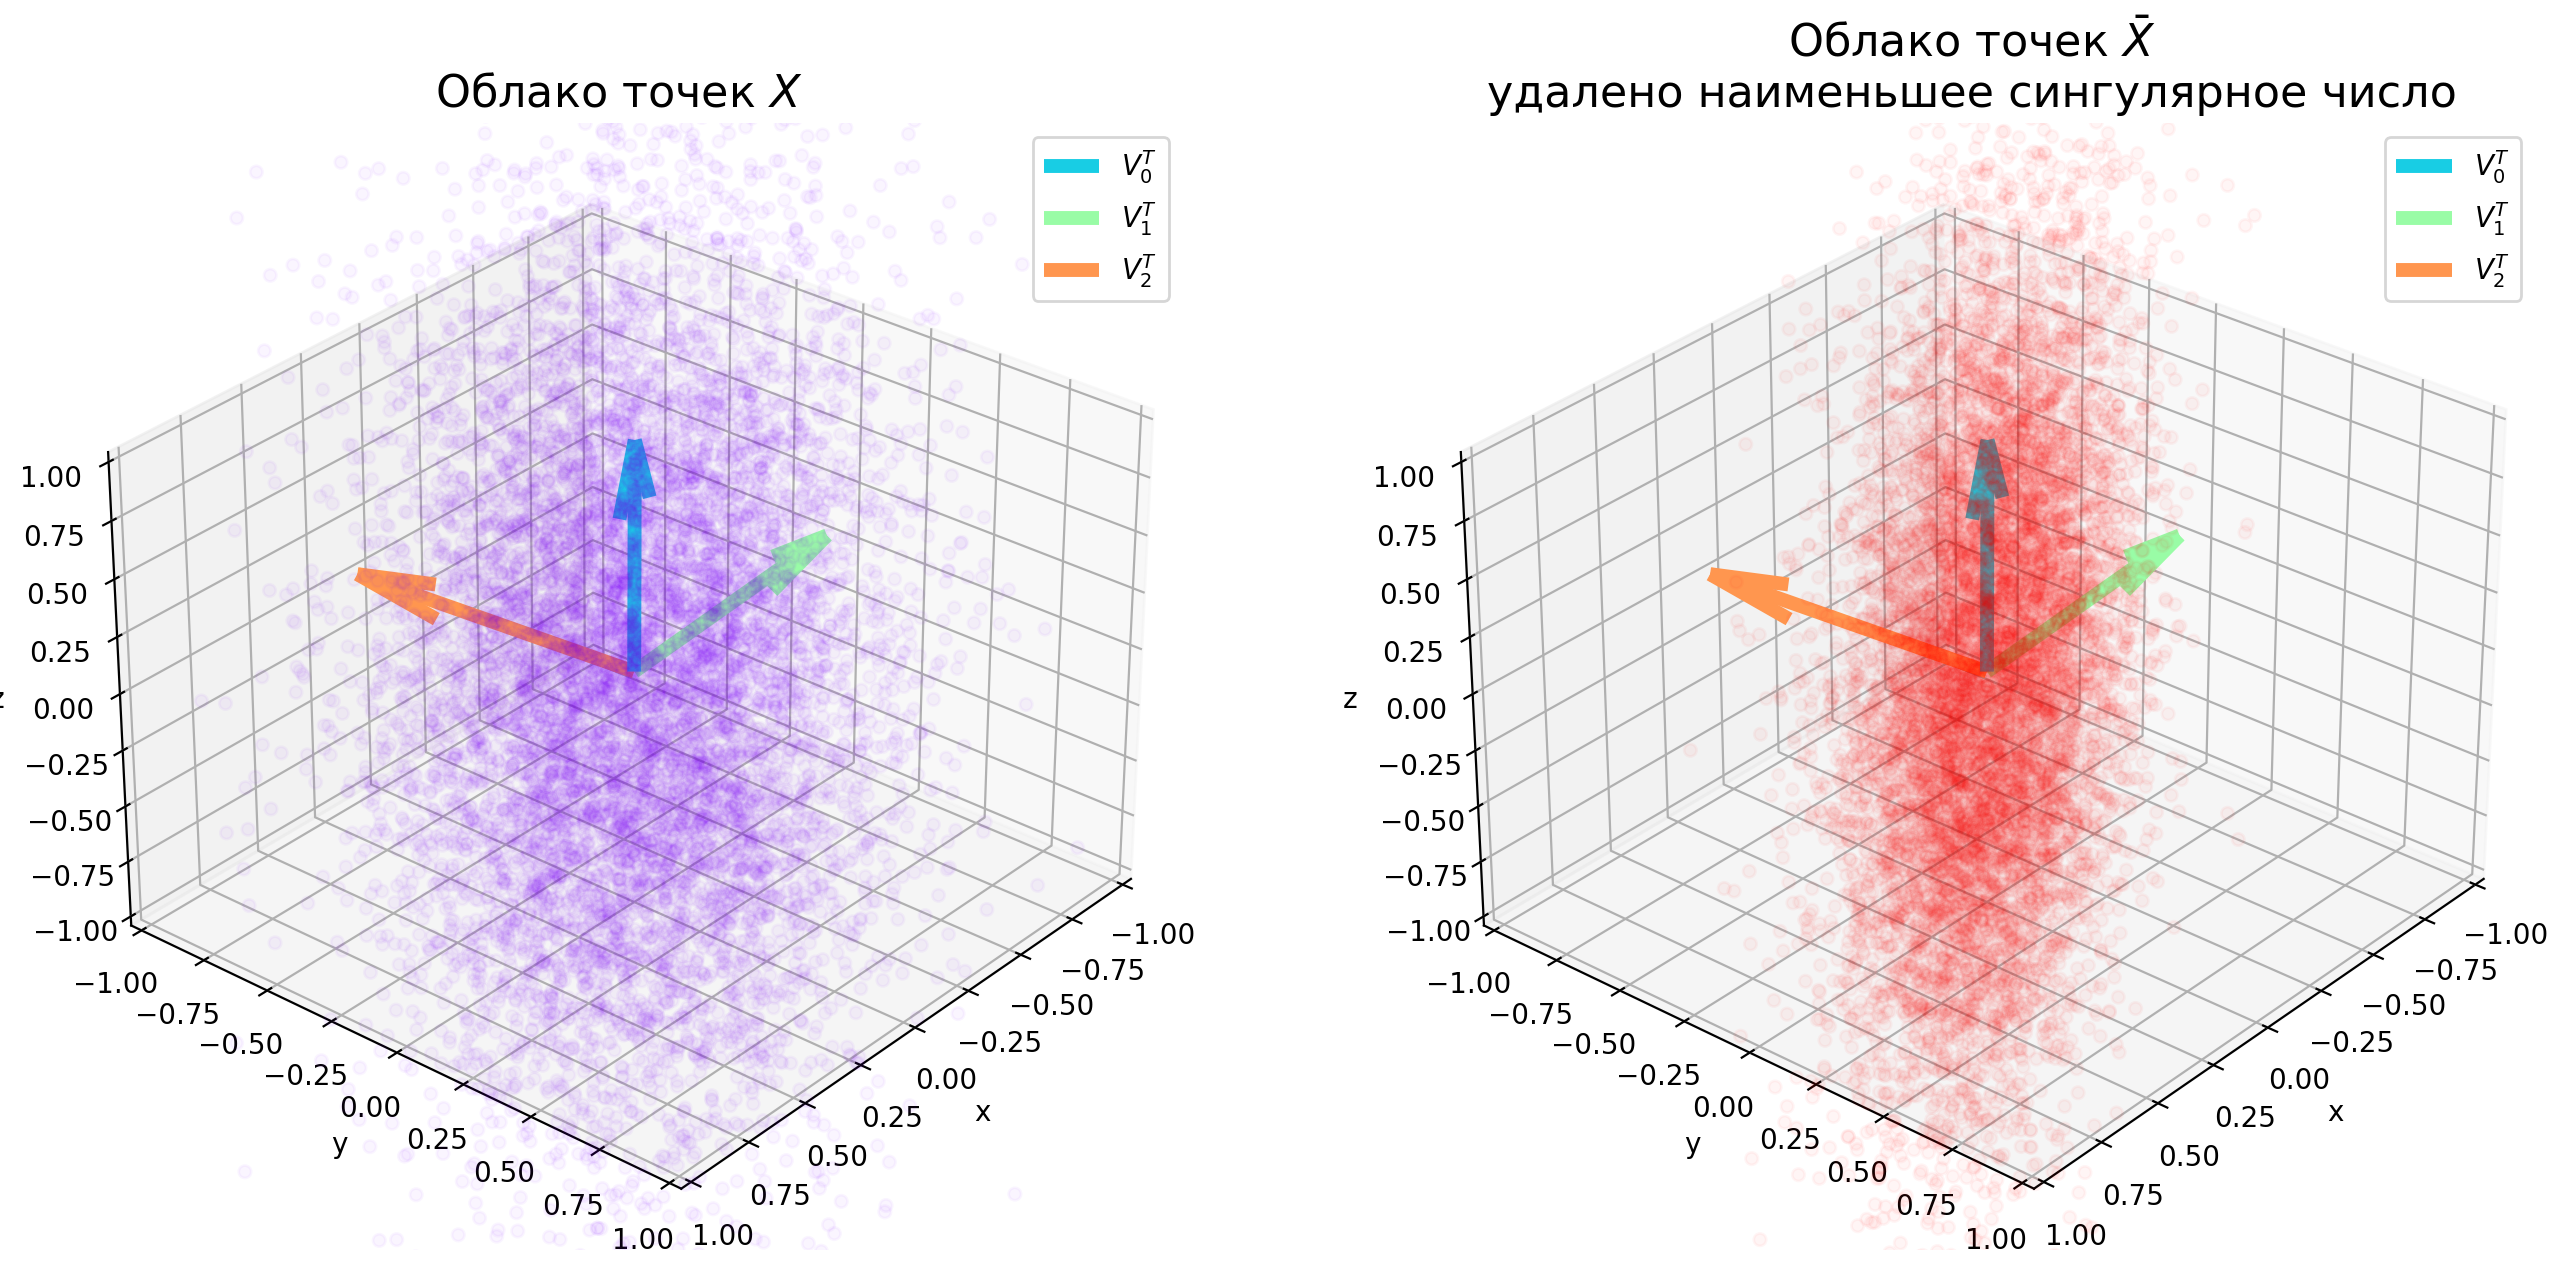

In [121]:
fig = plt.figure(figsize = (16, 8), dpi = 200)
colorscheme = cm.rainbow
ax_X = fig.add_subplot(121, projection = '3d')
ax_X_wave = fig.add_subplot(122, projection = '3d')
ax_X.view_init(30, 40, 0)
ax_X_wave.view_init(30, 40, 0)
ax_X.scatter3D(X[:, 0], X[:, 1], X[:, 2], color = colorscheme(0), alpha = 0.04)
ax_X_wave.scatter3D(X_wave[:, 0], X_wave[:, 1], X_wave[:, 2], color = colorscheme(0.99), alpha = 0.04)
for i in range(3):
    ax_X.quiver(0, 0, 0, VT[i, 0], VT[i, 1], VT[i, 2], color = colorscheme(i / 4 + 0.3), linewidth = 5, label = f'$V^T_{i}$')
    ax_X_wave.quiver(0, 0, 0, VT[i, 0], VT[i, 1], VT[i, 2], color = colorscheme(i / 4 + 0.3), linewidth = 5, label = f'$V^T_{i}$')

for a in [ax_X, ax_X_wave]:
    a.set_xlim(np.min(X[:, 0]), np.max(X[:, 0]))
    a.set_ylim(np.min(X[:, 1]), np.max(X[:, 1]))
    a.set_zlim(np.min(X[:, 2]), np.max(X[:, 2]))
    a.legend()
    a.set_xlabel("x")
    a.set_ylabel("y")
    a.set_zlabel("z")
    a.set_xlim(-1, 1)
    a.set_ylim(-1, 1)
    a.set_zlim(-1, 1)
    
ax_X.set_title("Облако точек $X$", fontsize = 16)
ax_X_wave.set_title(r"Облако точек $\bar{X}$" + "\nудалено наименьшее сингулярное число", fontsize = 16);


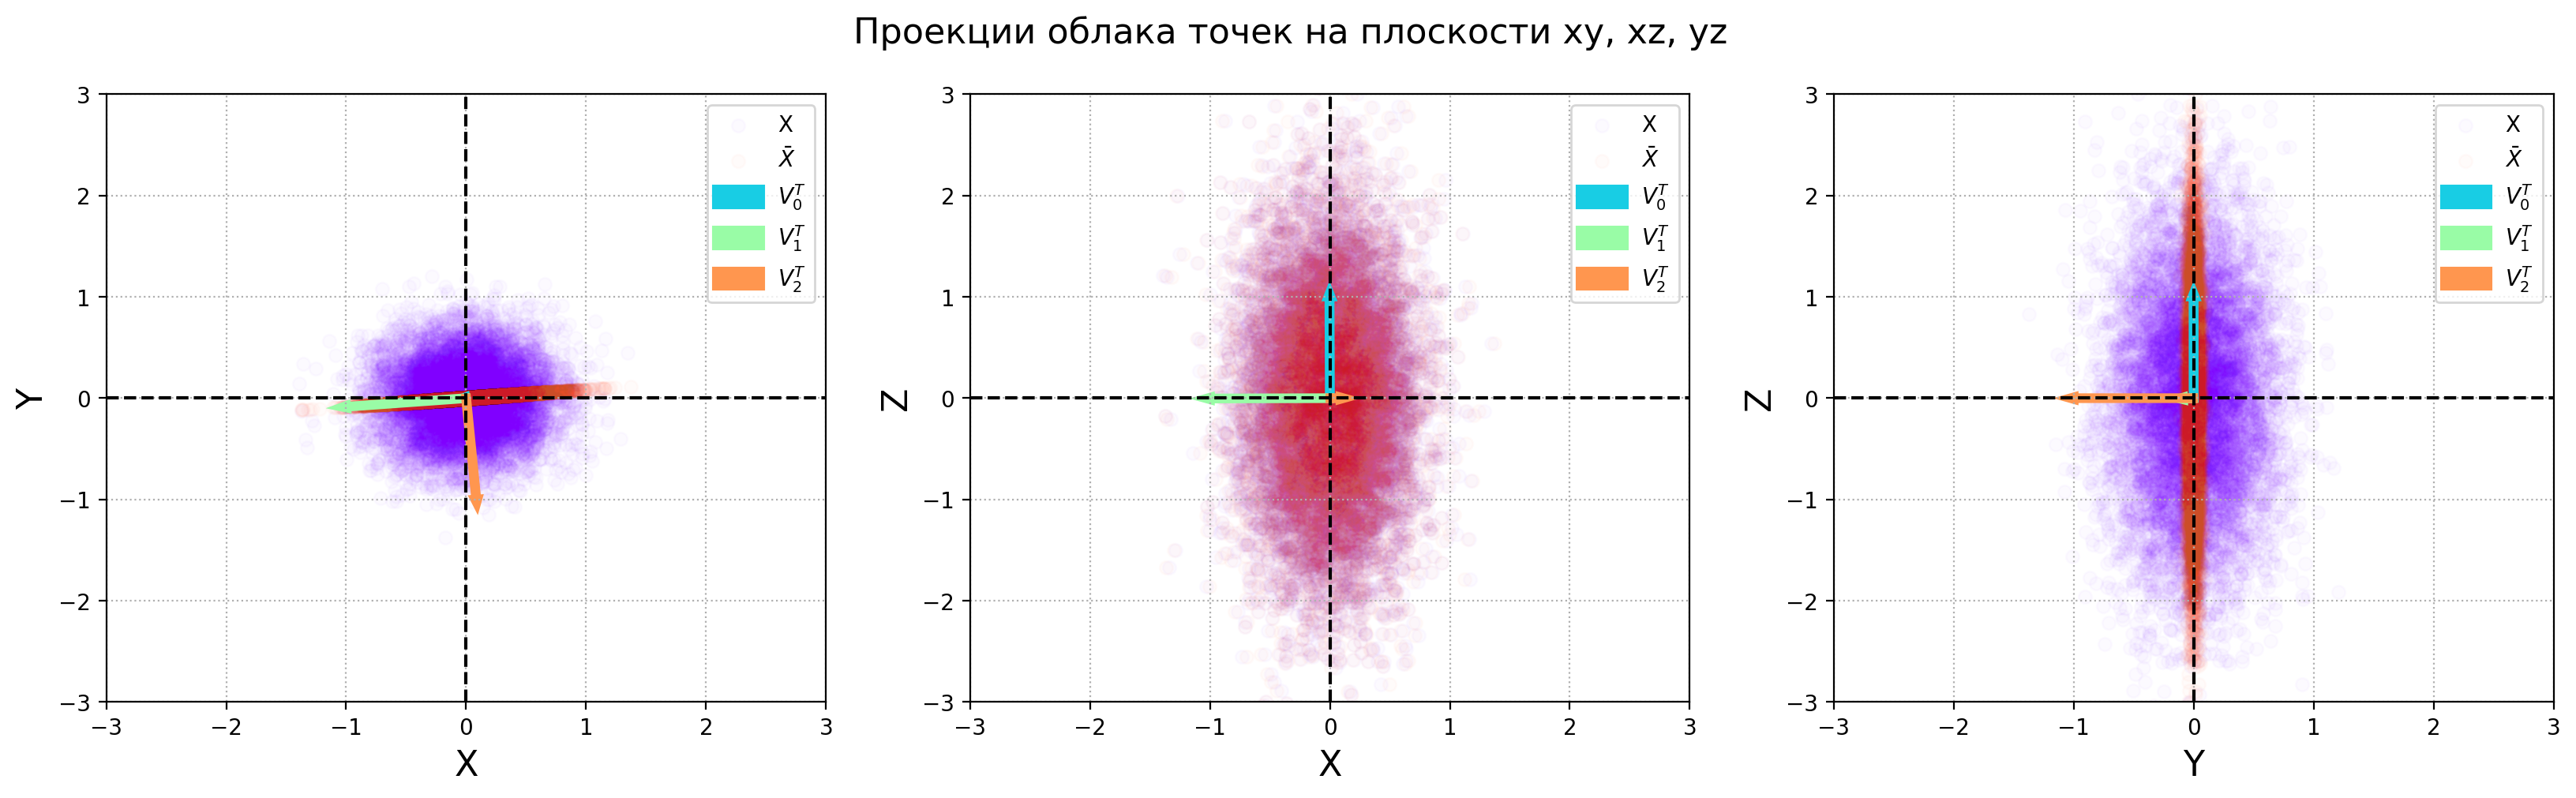

In [122]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5), dpi = 200)

pairs = [(0, 1), (0, 2), (1, 2)]
names = [['X', 'Y'], ["X", "Z"], ["Y", "Z"]]

for pair, name, plotable in zip(pairs, names, ax):
    plotable.scatter(X[:, pair[0]], X[:, pair[1]], label = 'X', color = colorscheme(0), alpha = 0.02)
    plotable.scatter(X_wave[:, pair[0]], X_wave[:, pair[1]], label = r'$\bar{X}$', color = colorscheme(0.9), alpha = 0.02)
    for i in range(3):
        plotable.arrow(0, 0, VT[i, pair[0]], VT[i, pair[1]], label = f'$V^T_{i}$', color = colorscheme(i / 4 + 0.3), linewidth = 4, width = 0.009)
    plotable.set_xlabel(name[0], fontsize = 16)
    plotable.set_ylabel(name[1], fontsize = 16)
    plotable.axhline(0, linestyle = '--', color = 'black')
    plotable.axvline(0, linestyle = '--', color = 'black')
    plotable.legend()
    plotable.grid(ls = ':')
    plotable.set_xlim(-3, 3)
    plotable.set_ylim(-3, 3)
    
fig.suptitle("Проекции облака точек на плоскости xy, xz, yz", fontsize = 16);

In [123]:
normal_vectors = {f"{i}{j}": np.cross(VT[i], VT[j]) for i, j in pairs}
projections = {f"{i}{j}": np.array([np.dot(p, VT[i]) * VT[i] + np.dot(p, VT[j]) * VT[j] for p in X]) for i, j in pairs}
projections_on_basis = {f"{i}{j}": np.array([np.array([np.dot(VT[i], p), np.dot(VT[j], p)]) for p in X]) for i, j in pairs}
projections_on_basis_wave = {f"{i}{j}": np.array([np.array([np.dot(VT[i], p), np.dot(VT[j], p)]) for p in X_wave]) for i, j in pairs}

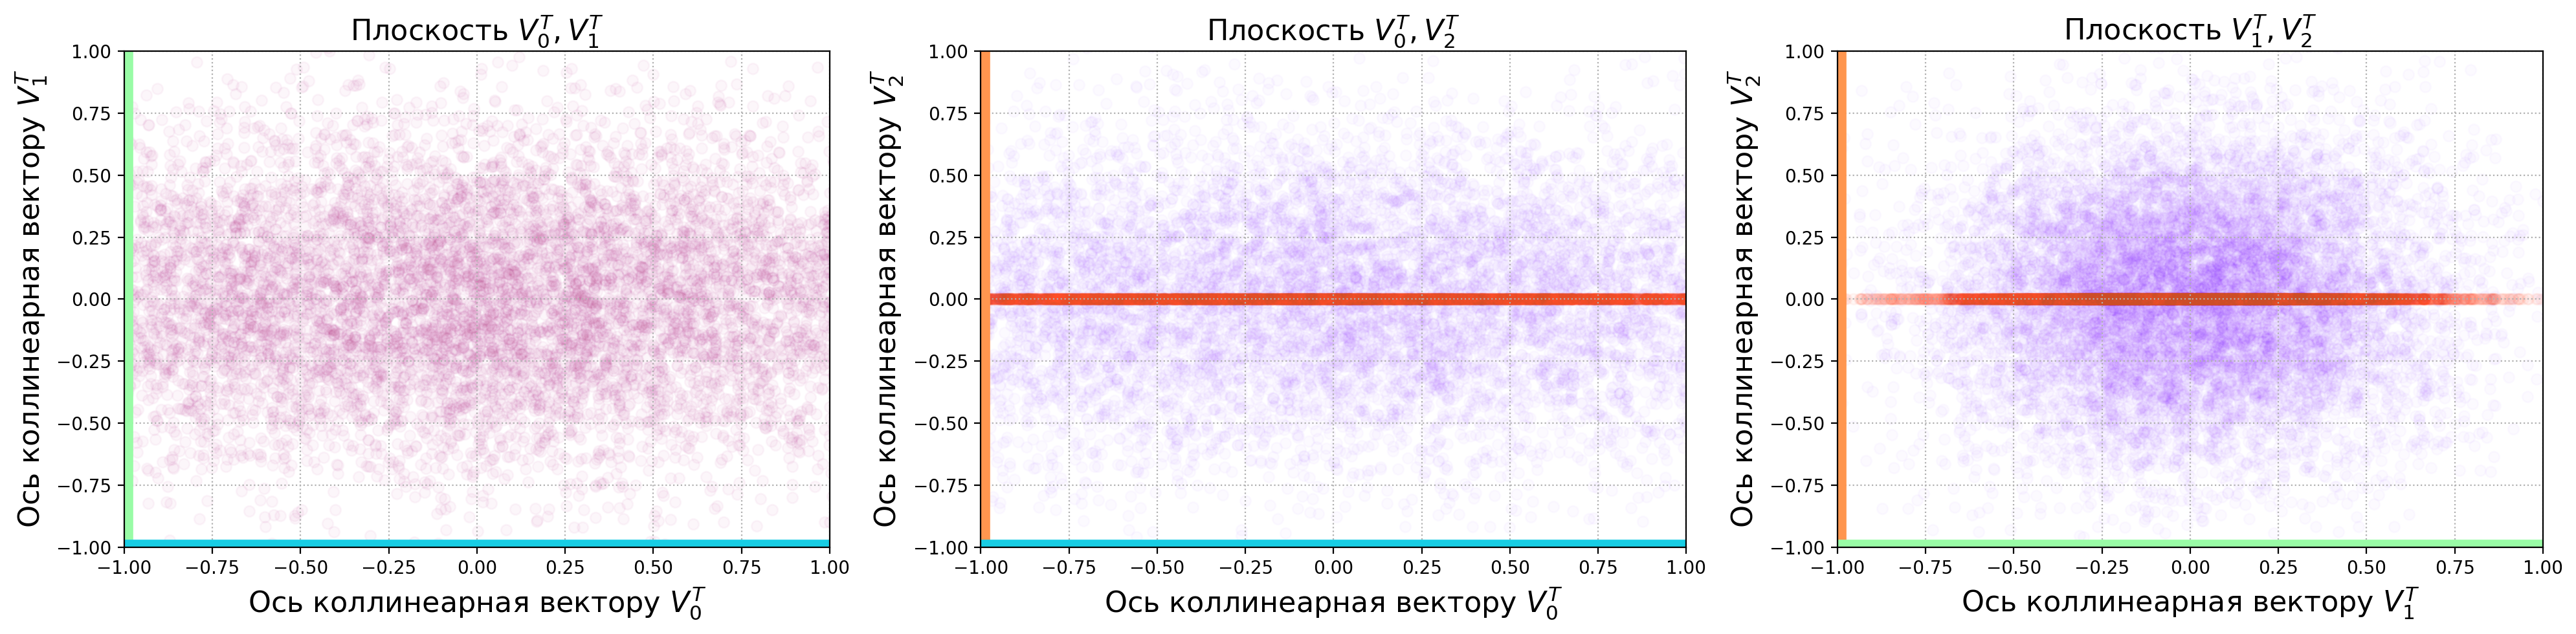

In [124]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5), dpi = 200)

for plotable, pair in zip(ax, pairs):
    i, j = pair
    plotable.scatter(projections_on_basis[f'{i}{j}'][:, 0], projections_on_basis[f'{i}{j}'][:, 1], alpha = 0.02, color = colorscheme(0))
    plotable.scatter(projections_on_basis_wave[f'{i}{j}'][:, 0], projections_on_basis_wave[f'{i}{j}'][:, 1], alpha = 0.02, color = colorscheme(0.9))
    plotable.set_title(f"Плоскость $V^T_{i}, V^T_{j}$", fontsize = 16)
    plotable.set_xlabel(f"Ось коллинеарная вектору $V^T_{i}$", fontsize = 16)
    plotable.set_ylabel(f"Ось коллинеарная вектору $V^T_{j}$", fontsize = 16)
    plotable.axvline(-0.99, color = colorscheme(j / 4 + 0.3), linewidth = 6)
    plotable.axhline(-0.99, color = colorscheme(i / 4 + 0.3), linewidth = 6)
    plotable.set_xlim(-1, 1)
    plotable.set_ylim(-1, 1)
    plotable.grid(ls = ':')

fig.tight_layout()

### Задача 5

Пусть в SVD-разложении можно пренебречь следующими малыми сингулярными значениями: $\varepsilon>\sigma_{r+1} \geq \sigma_{r+2} \geq \cdots \geq \sigma_n$. $\left(\varepsilon=10^{-8}\right)$. Тогда $x_{T S V D}=\sum_{i=1}^r \sigma_i^{-1} v_i\left(u_i^T b\right)(*)$. Параметр $\varepsilon$ определяет версию усеченного SVD (TSVD). Решение TSVD (* ) широко используется в качестве упорядоченного решения задачи. Однако решение (*) не является достаточно точным. Это может быть указано следующим образом.

Пусть матрицы левого и правого сингулярных векторов TSVD обозначены как $U_{T S V D}=\left[u_1, \ldots, u_r\right]$ и $V_{T S V D}=\left[v_1, \ldots, v_r\right]$, а их ортогональное дополнение $\widetilde{U_{a d d}}=\left[\widetilde{u_{r+1}}, \ldots, \widetilde{u_n}\right]$ и $\widetilde{V_{a d d}}=$ $\left[\widetilde{v_{r+1}}, \ldots, \widetilde{v_n}\right]$. Тогда решение системы будет выглядеть следующим образом:

$$
x=x_{T S V D}+\widetilde{V_{a d d}} Z_2
$$
Вектор $z_2$ находится: $\mathrm{C}_2=b_2$, где $C={\widetilde{U_{a d d}}}^T A \widetilde{V_{a d d}}, \quad b_2=$ ${\widetilde{U_{a d d}}}^T b$.

Рассмотрим в качестве примера СЛАУ с матрицей Гильберта, компоненты которой задаются формулой $H_{i, j}=\frac{1}{i+j-1}, i, j=\overline{1, n}$. Она относится к числу плохо обусловленных матриц. Характерная особенность этой матрицы в том, что при возрастании еe порядка минимальные собственные числа (сингулярные числа) очень быстро стремятся к нулю.

Решите систему обычным стандартным методом (из библиотеки numpy) и этим методом. Оцените невязку.

 $H_n x_n=b_n$, где $b_n=\{1,0,0,0,0,0,0,0\}$ для $\mathrm{n}=8$, $b_n=\{1,0,0,0,0,0,0,0,0,0\}$ для $\mathrm{n}=10$.

Число обусловленности для матрицы $\mathrm{H}_8$ равно $3.387 \cdot 10^{10}$, а для $\mathrm{H}_{10}$ равно $3.535 \cdot 10^{13}$.

In [125]:
def get_hilbert_matrix(n: int) -> np.ndarray:
    """Возвращает матрицу Гильберта заданного размера

    Args:
        n (int): размер матрицы

    Returns:
        np.ndarray: матрица Гильберта
    """
    i, j = np.arange(n) + 1, np.arange(n) + 1
    I, J = np.meshgrid(i, j)
    H = 1 / (I + J - 1)
    return H

def strange_method(H: np.ndarray, b: np.ndarray, eps: float = 1e-8) -> np.ndarray:
    U, sigma, VT = np.linalg.svd(H, full_matrices = False)
    sigma_wave = (sigma > eps) * sigma
    right_part = np.dot(U.T, b)
    middle_part = np.dot(np.diag(1 / sigma_wave), right_part)
    x = np.dot(VT.T, middle_part)
    return x

In [126]:
n = 5
H = get_hilbert_matrix(n)
b = np.hstack([[1], np.zeros(n - 1)])
numpy_linalg, tsvd = np.linalg.solve(H, b), strange_method(H, b)
numpy_linalg_normed, tsvd_normed = numpy_linalg / np.max(numpy_linalg), tsvd / np.max(tsvd)
print(numpy_linalg_normed)
print(tsvd_normed)
print(np.allclose(numpy_linalg_normed, tsvd_normed))

[ 0.02380952 -0.28571429  1.         -1.33333333  0.6       ]
[ 0.02380952 -0.28571429  1.         -1.33333333  0.6       ]
True


In [127]:
n_values = np.arange(100) + 1
number_of_exp = 20
method_difference_hilbert = []
method_difference_random = []
for n in n_values:
    random_matrix = 1e20 * np.random.random((n, n))
    H = 1e20 * get_hilbert_matrix(n)
    b = np.hstack([[1], np.zeros(n - 1)])
    numpy_linalg, tsvd = np.linalg.solve(H, b), strange_method(H, b)
    numpy_linalg_random,  tsvd_random = np.linalg.solve(random_matrix, b), strange_method(random_matrix, b)
    numpy_linalg_normed, tsvd_normed = numpy_linalg / np.linalg.norm(numpy_linalg), tsvd / np.linalg.norm(tsvd)
    numpy_linalg_random_normed, tsvd_random_normed = numpy_linalg_random / np.linalg.norm(numpy_linalg_random), tsvd_random / np.linalg.norm(tsvd_random)
    method_difference_hilbert.append(np.linalg.norm(numpy_linalg_normed - tsvd_normed))
    method_difference_random.append(np.linalg.norm(numpy_linalg_random_normed - tsvd_random_normed))

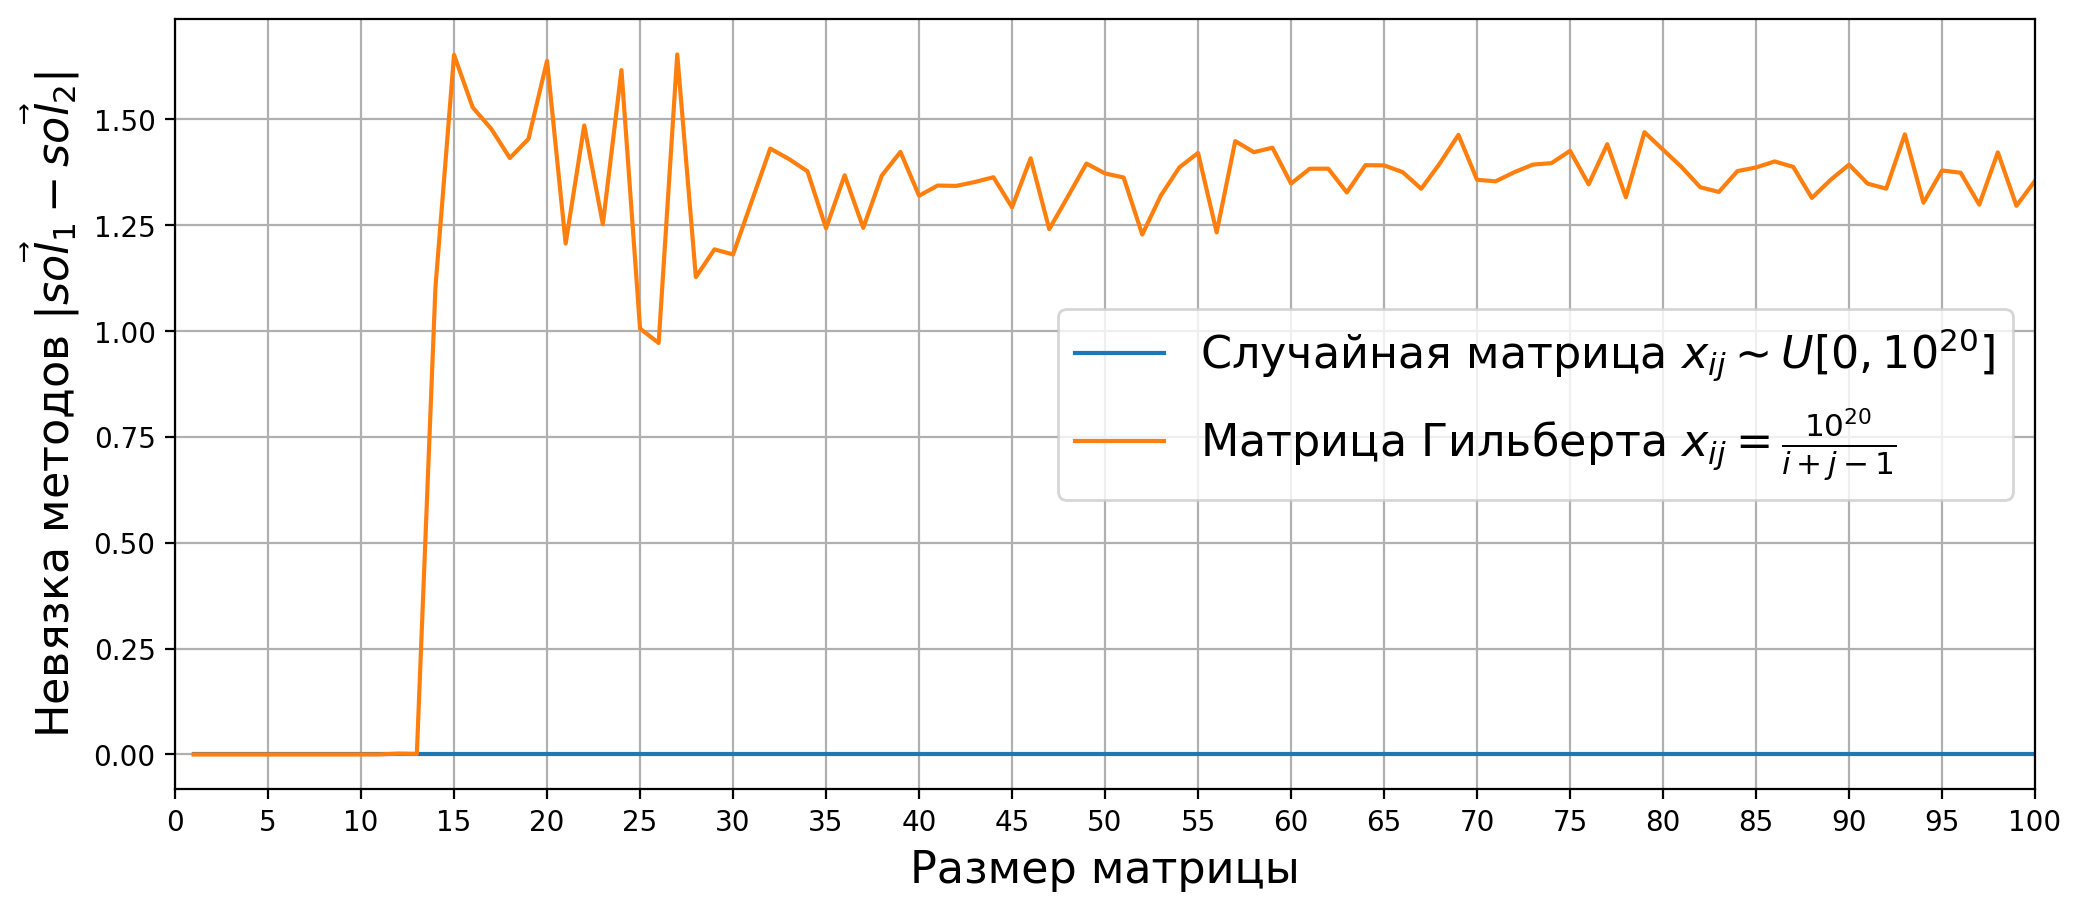

In [128]:
plt.figure(figsize = (12, 5), dpi = 200)

plt.plot(n_values, method_difference_random, label = r"Случайная матрица $x_{ij} \sim U[0, 10^{20}]$")
plt.plot(n_values, method_difference_hilbert, label = r"Матрица Гильберта $x_{ij} = \frac{10^{20}}{i + j - 1}$")
plt.grid()
plt.xlabel("Размер матрицы", fontsize = 16)
plt.ylabel(r"Невязка методов $|\vec{sol_{1}} - \vec{sol_{2}}$|", fontsize = 16)
plt.xticks(np.arange(0, 120, 5))
plt.xlim(0, 100)
plt.legend(fontsize = 16);

### Задача 6 - Преобразование Прокруста

In [129]:
data = pd.read_csv("signatureData.csv")
data.head()

x1       x2      y1     y2
0 -512.46  25.3830 -288.31 -71.76
1 -499.90  17.6250 -265.31 -58.76
2 -477.64   5.0726 -242.31 -45.76
3 -453.88 -10.0780 -220.31 -32.76
4 -427.89 -25.0950 -199.31 -20.76

In [130]:
def plot_transform(data: pd.DataFrame):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)

    ax[0].scatter(data.x1, data.x2, label = 'X1', color  = 'purple')
    ax[0].scatter(data.y1, data.y2, label = 'X2', color = 'green')
    X1_mean = np.array([np.mean(data.x1), np.mean(data.x2)])
    X2_mean = np.array([np.mean(data.y1), np.mean(data.y2)])
    X1 = np.hstack([data.x1.to_numpy()[:, np.newaxis], data.x2.to_numpy()[:, np.newaxis]])
    X2 = np.hstack([data.y1.to_numpy()[:, np.newaxis], data.y2.to_numpy()[:, np.newaxis]])
    X1_centralized = np.hstack([(data.x1 - np.mean(data.x1)).to_numpy()[:, np.newaxis], 
                                (data.x2 - np.mean(data.x2)).to_numpy()[:, np.newaxis]])
    X2_centralized = np.hstack([(data.y1 - np.mean(data.y1)).to_numpy()[:, np.newaxis], 
                                (data.y2 - np.mean(data.y2)).to_numpy()[:, np.newaxis]])
    U, D, Vt = svd(X1_centralized.T @ X2_centralized)
    Rotation = U @ Vt
    Translation = X2_mean - Rotation.T @ X1_mean
    Translation = np.repeat(Translation[:, np.newaxis], X1.shape[0], axis = 1).T
    X1_new = Translation + X1 @ Rotation
    ax[1].scatter(X1_new[:,0], X1_new[:,1], label = 'X1`', color = 'purple')
    ax[1].scatter(X2[:,0], X2[:,1], label = 'X2', color = 'green')
    ax[0].set_title("До преобразования", fontsize = 16)
    ax[1].set_title("После преобразования", fontsize = 16)
    for a in ax:
        a.grid(ls = ':')
        a.legend()

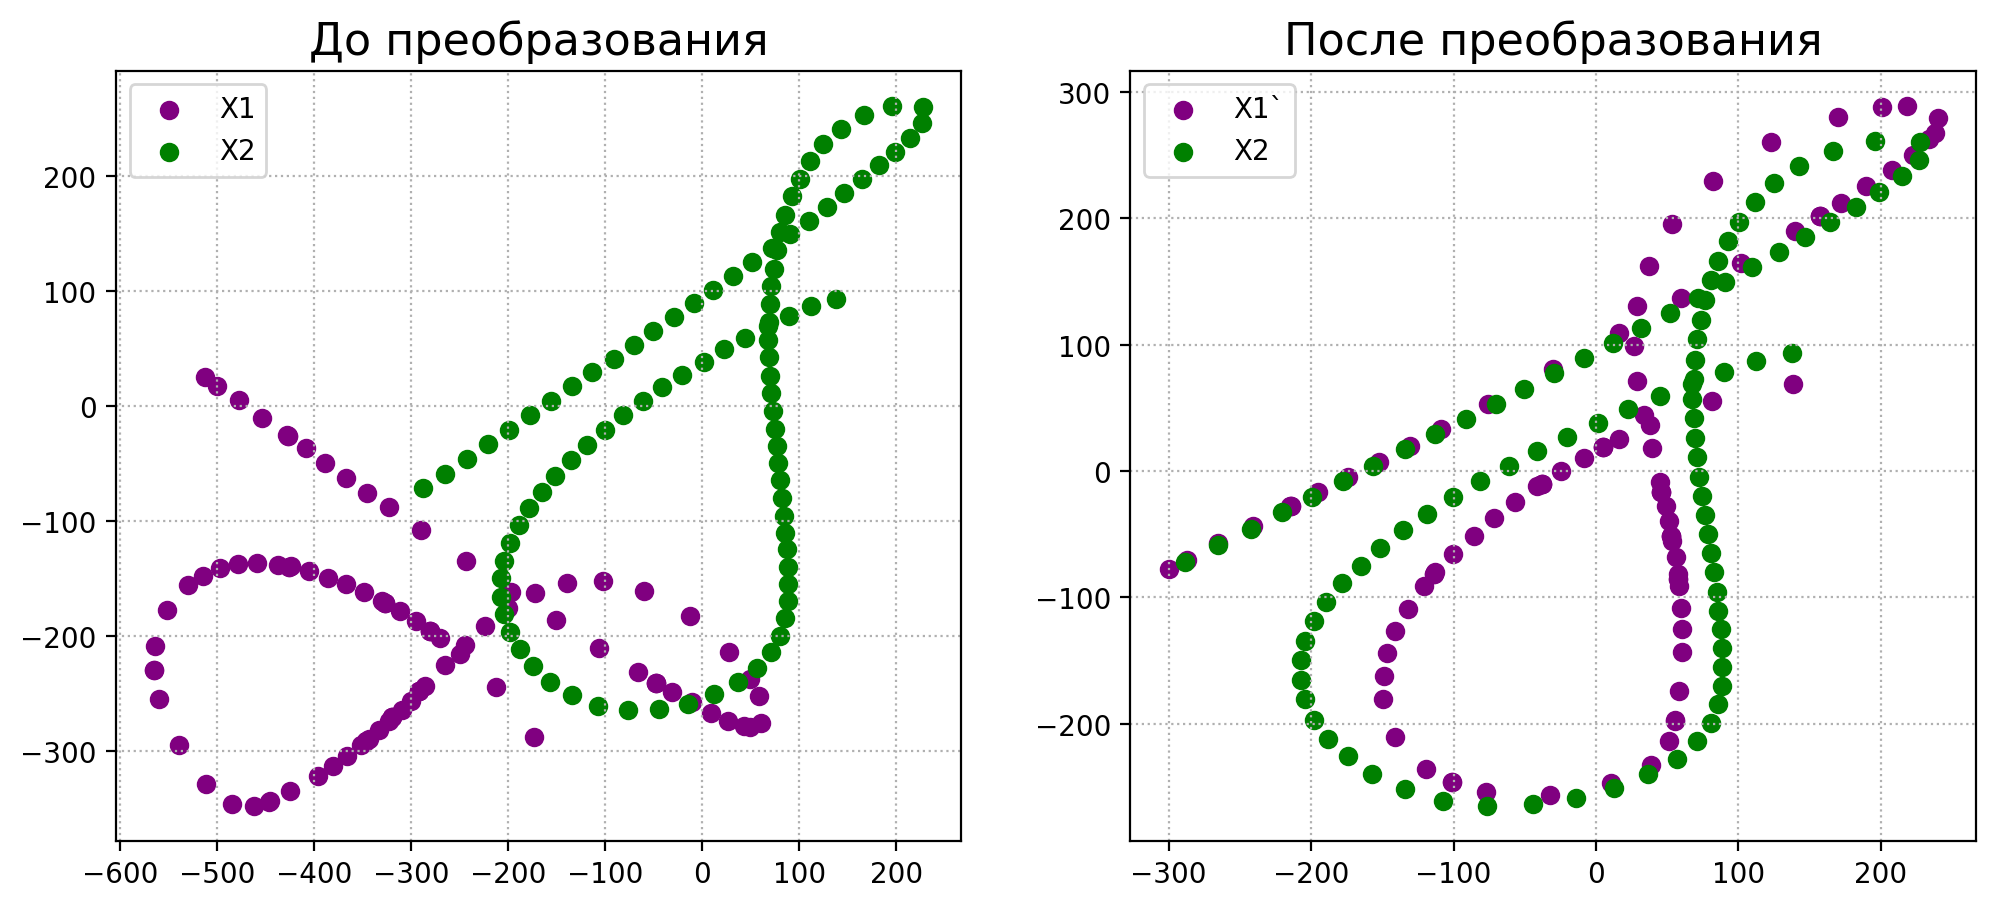

In [131]:
plot_transform(data)

In [132]:
two_lines_dataset = {
"x1": [
    1.2, 2.5, 3.1, 4.2, 5.6, 6.3, 7.8, 8.7, 9.4, 10.2,
    11.1, 12.5, 13.3, 14.8, 15.7, 16.4, 17.2, 18.6, 19.3, 20.0
],
"x2": [
    0.8, 2.2, 3.6, 4.9, 6.4, 7.9, 8.6, 9.8, 11.2, 12.7,
    14.0, 15.5, 16.9, 18.2, 19.6, 20.3, 21.8, 23.2, 24.4, 25.9
],
"y1": [
    2.1, 3.4, 4.8, 5.9, 6.6, 7.9, 8.5, 9.9, 11.2, 12.6,
    13.7, 14.9, 16.3, 17.6, 18.9, 20.2, 21.5, 22.7, 23.9, 25.3
],
"y2": [
    1.9, 3.2, 4.6, 5.7, 7.2, 8.7, 9.3, 10.8, 12.1, 13.4,
    14.5, 15.9, 17.2, 18.6, 19.9, 21.2, 22.6, 23.8, 25.0, 26.4
]
}
two_lines_dataset = pd.DataFrame(two_lines_dataset)

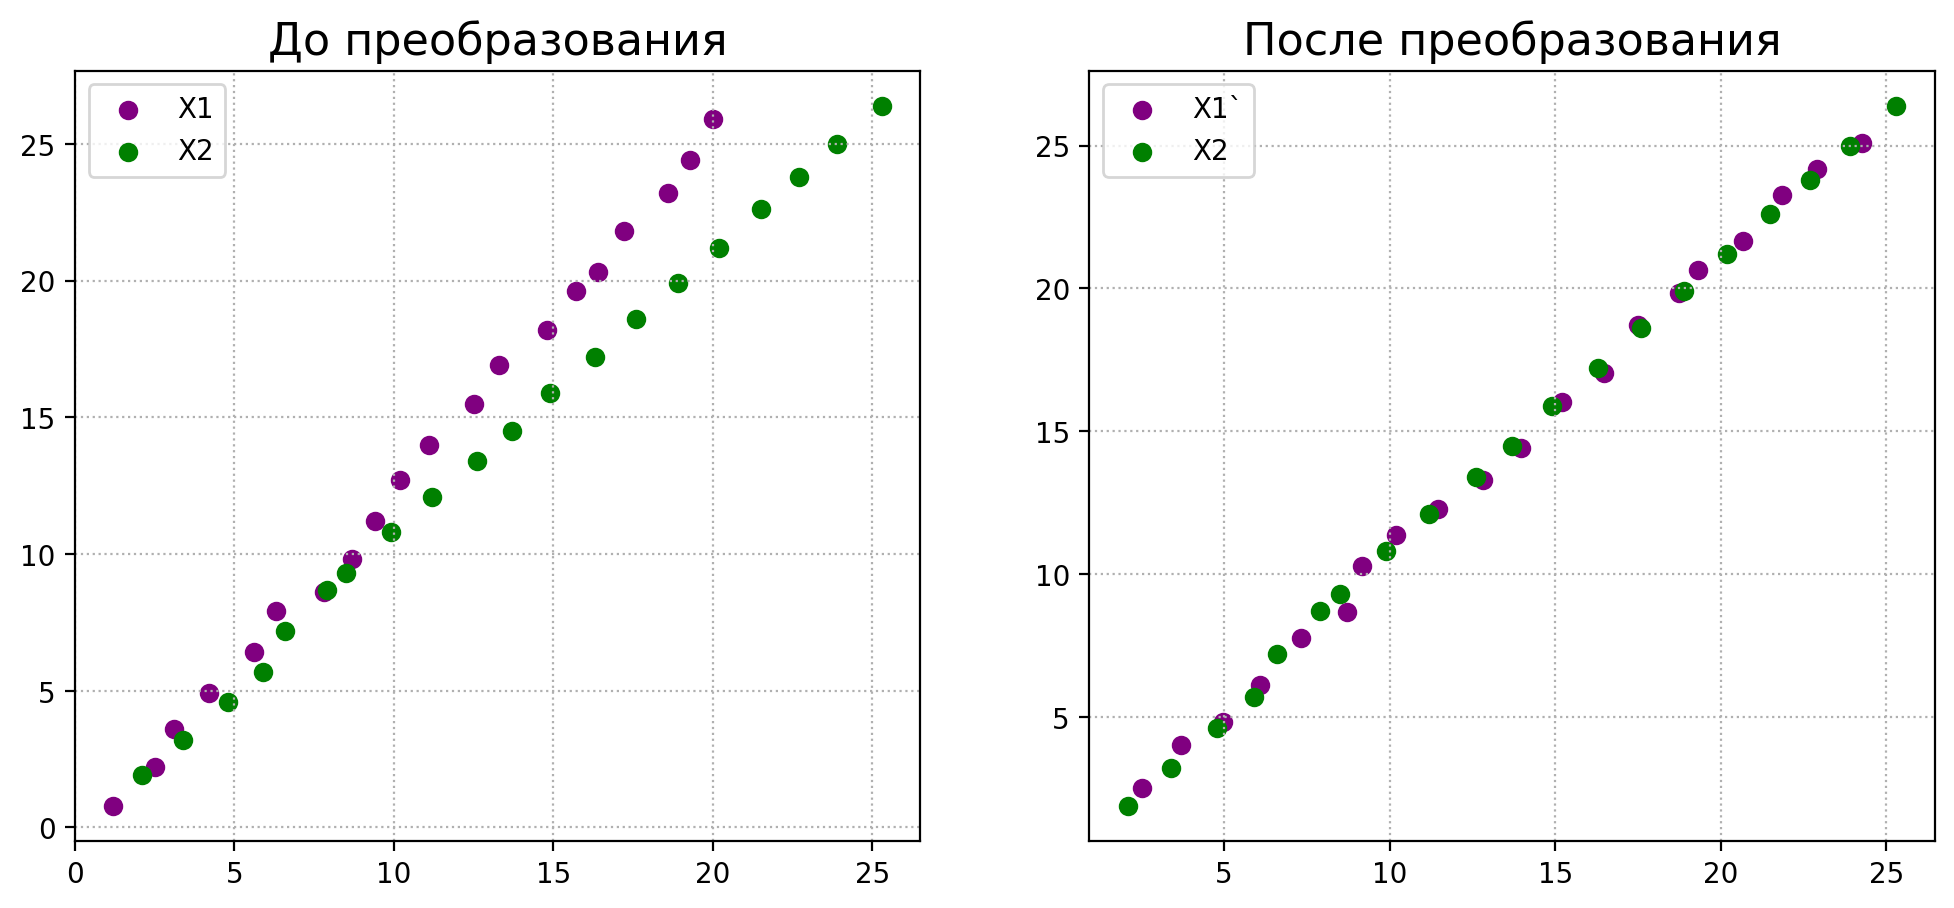

In [133]:
plot_transform(two_lines_dataset)